# Laboratorio 8 Analisis de señales 2023-1
# Filtros con respuesta finital al impulso (FIR) parte II
## ANÁLISIS DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
**joseiglesias@unicesar.edu.co**

## Transmisión de datos en un canal Telefónico

En esta práctica se usará un canal telefónico para observar el efecto del canal sobre esquemas sencillos de transmisión de datos.

## 1. Preparación

1. Defina una frecuencia de muestreo (fs) de 24000\,Hz

2. Cree un filtro FIR pasa--banda de orden 600, frecuencias de corte en radianes correspondientes a 500 Hz y 3500 Hz, y un ancho de banda de transición de 100 Hz. Para esto puede usar las siguientes instrucciónes. 

In [1]:
import scipy.signal as sp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

In [5]:
fs=24000
wa = 500.0 / (fs/2)
wb = 3500.0 / (fs/2)
wd = 100. / (fs/2)
h=sp.remez(600, [0, wa-wd, wa, wb, wb+wd, 1], [0, 1, 0], [1, 10, 1], Hz=2, maxiter=50)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_145312\1941613849.py:5: DeprecationWarning: 'remez' keyword argument 'Hz' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  h=sp.remez(600, [0, wa-wd, wa, wb, wb+wd, 1], [0, 1, 0], [1, 10, 1], Hz=2, maxiter=50)


¿Qué puede notar acerca de la forma de diseñar el filtro, respecto a lo realizado en el laboratorio pasado?

3. Grafique la respuesta en frecuencia del filtro, y la respuesta natural. Para la respuesta en frecuencia puede usar la siguiente instrucción.

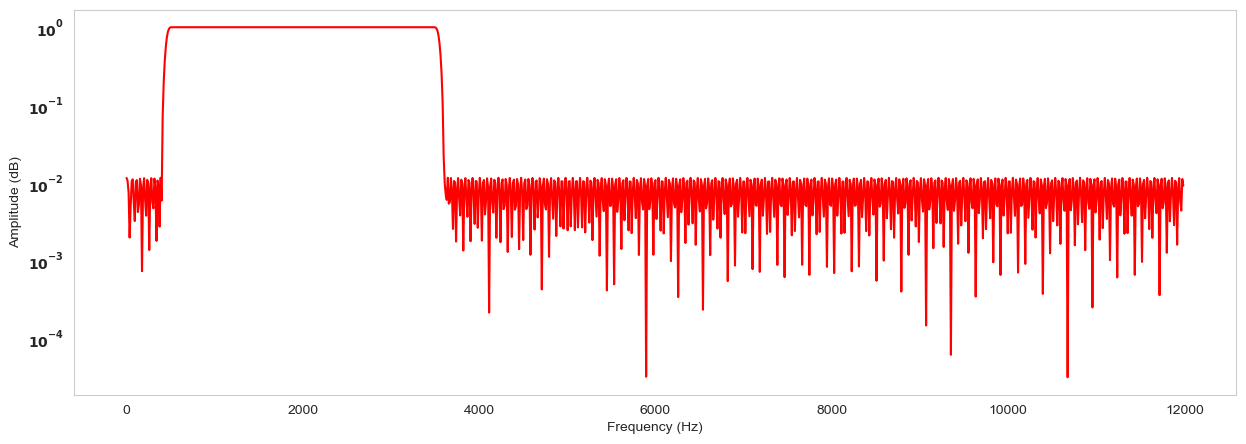

In [6]:
w, H = sp.freqz(h, worN=1024)
H = np.abs(H)
plt.figure(figsize=(15,5))
plt.semilogy(w/np.pi * (fs/2), H, 'red');
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.grid()
plt.show()

Grafique aqui la respuesta natural, y concluya sobre las dos graficas


4. Genere una secuencia de 500 bits aleatorios, y codifiquelos de tal forma que un '+1' se codifique como '1', y un '0' se codifique como '-1'. Puede usar la funcion ```np.random.rand``` para generar la secuancia aleatoria

In [7]:
b=2*np.random.rand(500)-1
b=np.sign(b).reshape((500,1))

## 2. Transmisión Simple

1. Defina la tasa de bits por segundo a la que desea transmitir (BPS). Explique por qué escogió dicha tasa de transmisión.

Recuerde el concepto de Capacidad de Canal

$$C=\mathrm{BW}\left(1+\frac{S}{N}\right)$$




In [8]:
BPS=100

2. Encuentre la correspondiente duración de cada bit, de acuerdo con su frecuencia de muestreo $\mathrm{SPB}=\mathrm{int}(\mathrm{fs}/\mathrm{BPS})$

In [9]:
SPB=int(fs/BPS)
SPB

240

3. Genere la señal a transmitir con base en la secuencia de bits generada, la tasa de transmisión de bits por segundo, y la duración de cada bit. Puede usar la siguiente instrucción. Donde  $b$ es la secuencia de 500 bits creada previamente.

In [10]:
x = (b * np.ones([1, SPB])).flatten()

4. Grafique la señal para los primeros 50 bits.

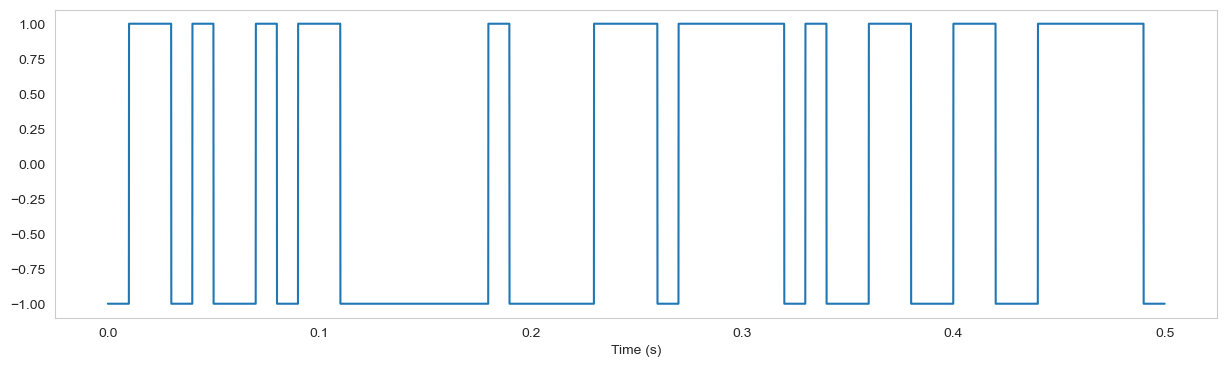

In [11]:
t=np.arange(0,50*SPB)/fs
plt.figure(figsize=(15,4))
plt.plot(t,x[0:int(50*SPB)])
plt.xlabel("Time (s)")
plt.grid()

5. Puede escuchar la señal generada previamente (x). Con base en lo escuchado se puede anticipar que van a existir problemas en la transmisión de esta señal. 

¿Puede anticipar por qué?

In [12]:
Audio(x,rate=fs)

6. Transmita la señal generada por el filtro de canal telefónico, y grafique la señal recibida para los primeros 50 bits. ¿Qué puede decir al respecto? 

Nota: en la convolución para calcular la salida use la opción ```mode='same'``` ¿Qué se puede apreciar?

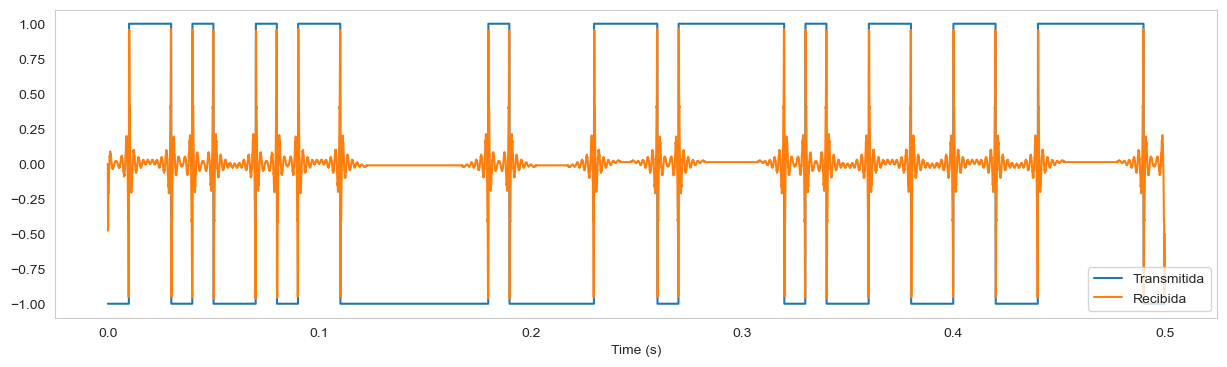

In [13]:
y=np.convolve(x,h, mode="same")

t=np.arange(0,50*SPB)/fs
plt.figure(figsize=(15,4))
plt.plot(t,x[0:int(50*SPB)], label="Transmitida")
plt.plot(t,y[0:int(50*SPB)], label="Recibida")
plt.xlabel("Time (s)")
plt.legend()
plt.grid()

7. Si no puede observar nada, realice un zoom de la gráfica, graficando únicamente los primeros 5 bits de la transmisión.

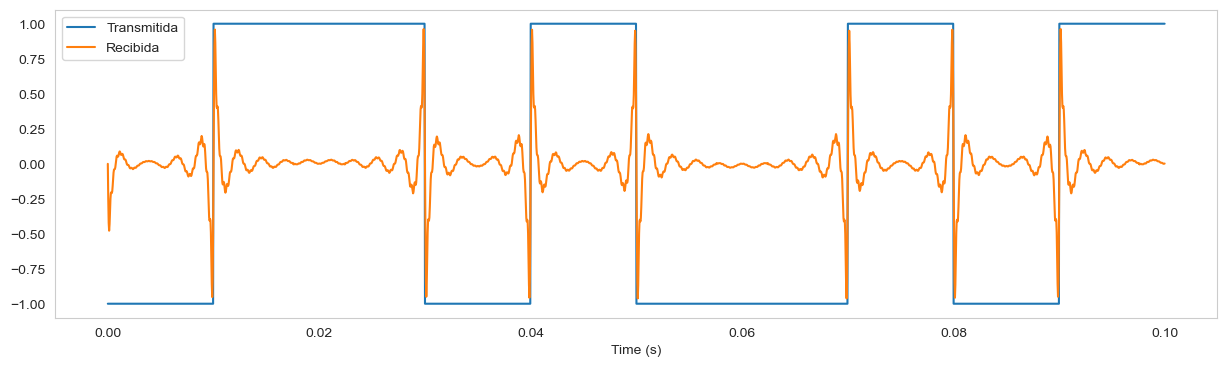

In [14]:
t=np.arange(0,10*SPB)/fs
plt.figure(figsize=(15,4))
plt.plot(t,x[0:int(10*SPB)], label="Transmitida")
plt.plot(t,y[0:int(10*SPB)], label="Recibida")
plt.xlabel("Time (s)")
plt.legend()
plt.grid()

8. Con base en lo observado previamente.

¿Cómo cree usted que se puede recuperar la señal transmitida?

9. Para entender un poco mejor el comportamiento de lo que está ocurriendo, grafique la transformada de Fourier de la señal transmitida, de la respuesta del filtro, y de la señal recibida, y concluya al respecto.

Text(0, 0.5, 'Amplitude (dB)')

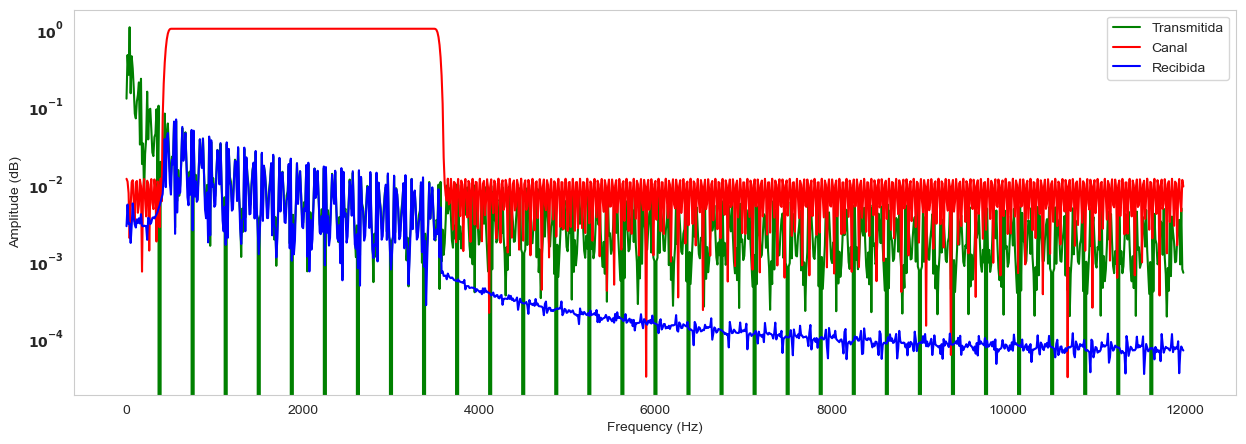

In [15]:
N = len(w)
X = np.abs(np.fft.fft(x, 2*N))
X = X[0:N];
plt.figure(figsize=(15,5))
plt.semilogy(w/np.pi * (fs/2), X/N, 'green', label="Transmitida")
plt.semilogy(w/np.pi * (fs/2), H, 'red', label="Canal");

Y = np.abs(np.fft.fft(y, 2*N))
Y = Y[0:N];
plt.semilogy(w/np.pi * (fs/2), Y/N, 'blue', label="Recibida");
plt.legend()
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")

10. Como se puede solucionar el problema presentado en esta transmisión

## 3. Modulación por retardos de frecuencia (FSK)

Para acomodar la naturaleza pasabandas del canal telefónico, una estrategia es usar FSK. En este esquema se generan dos frecuencias $\omega_0$ y $\omega_1$ para codificar los bits. En este caso la señal transmitida será una sinusoidal con frecuencia $\omega_0$ o $\omega_1$ de acuerdo con el valor del bit.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/39/Fsk.svg" style="height:400px">



1. Defina las frecuencias $f_1$ y $f_2$ para ser usadas en la transmisión, de acuerdo con su propio criterio.

¿Explique por qué?

¿Existe algun criterio para definir las frecuencias optimas para la portadora?

[Material recomendado](https://www.beunicoos.com/tecnologia/radiofrecuencia/modulacion/fsk-1554921355)



In [16]:
f1=1200
f2=1600

2. Convierta las frecuencias a radianes, y normalicelas respecto a la frecuencia de muestreo.

In [32]:
w0 = np.pi * f1 / (fs/2)
w1 = np.pi * f2 / (fs/2)

3.  Genere la señal para ser transmitida de acuerdo con la secuencia de bits. Puede usar las siguientes instrucciones.

In [33]:
bw = np.array([w0 if v == -1 else w1 for v in b])[:,None]

# now associate BPS samples to each bit
x = (bw * np.ones([1, SPB])).flatten()

# and now build the FSK signal
x = np.cos(np.arange(0, len(x)) * x)

4. Grafique la señal obtenida para los primeros 10 bits. En este caso es necesario aumentar el tamaño de la grafica.

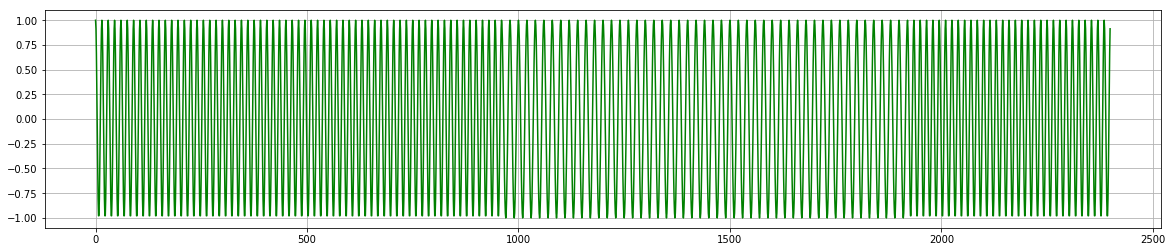

In [42]:
plt.figure(figsize=(20,4))
plt.plot(x[0:SPB*10], 'green')
plt.ylim([-1.1, 1.1]);
plt.grid()

5. Se puede escuchar la señal a transmitir. ¿Suena a algo familiar?

In [35]:
Audio(x,rate=fs)

6. Transmita la señal por el canal telefónico y grafique y escuche la señal recibida. Comparela respecto a la señal de entrada.

In [37]:
y=np.convolve(x,h, mode="same")

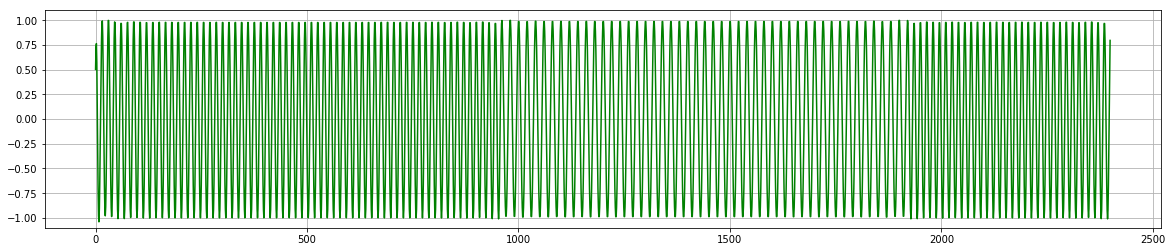

In [43]:
plt.figure(figsize=(20,4))
plt.plot(y[0:SPB*10], 'green')
plt.ylim([-1.1, 1.1]);
plt.grid()

7. Grafique la transformada de Fourier de la señal de salida, de la señal de entrada, y la respuesta del filtro, y compare las respuestas. Concluya.

Text(0,0.5,'Amplitude (dB)')

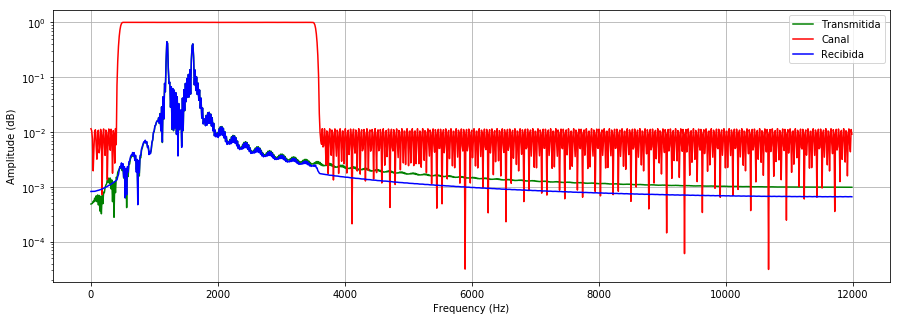

In [40]:
N = len(w) # use the same number of points as the filter's frequency response
X = np.abs(np.fft.fft(x, 2*N))
X = X[0:N]
plt.figure(figsize=(15,5))
plt.semilogy(w/np.pi * (fs/2), X/N, 'green', label="Transmitida")
plt.semilogy(w/np.pi * (fs/2), H, 'red', label="Canal");

Y = np.abs(np.fft.fft(y, 2*N))
Y = Y[0:N];
plt.semilogy(w/np.pi * (fs/2), Y/N, 'blue', label="Recibida");
plt.legend()
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")